In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Input program

In [2]:
dataset = pd.read_csv('../Dataset/dummy_hitung_nilai_input.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   nim       500 non-null    int64
 1   formatif  500 non-null    int64
 2   uts       500 non-null    int64
 3   uas       500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB
None


In [3]:
print(dataset)

            nim  formatif  uts  uas
0    1114091001        76   60   82
1    1114091002       100   85   52
2    1114091003        74   93   98
3    1114091004        70   82   93
4    1114091005        99   71   94
..          ...       ...  ...  ...
495  1114091496       100  100   85
496  1114091497        72   89   69
497  1114091498        84   83   89
498  1114091499        72   58   70
499  1114091500        75  100   92

[500 rows x 4 columns]


### Proses program

In [4]:
dataset["nilai_akhir"] = dataset["formatif"] * 0.4 + dataset["uts"] * 0.3 + dataset["uas"] * 0.3

In [5]:
def nilai_huruf(nilai_akhir):
    huruf = []

    for x in nilai_akhir:
        if x >= 80:
            huruf.append("A")
        elif x >= 70:
            huruf.append("B")
        elif x >= 60:
            huruf.append("C")
        elif x >= 50:
            huruf.append("D")
        else:
            huruf.append("E")
    return huruf

In [6]:
# Proses menentukan nilai huruf
nilai_huruf = nilai_huruf(np.array(dataset["nilai_akhir"]))


In [7]:
# Menambahkan kolom nilai huruf
dataset["nilai_huruf"] = nilai_huruf

### Output program

In [8]:
print(dataset)

            nim  formatif  uts  uas  nilai_akhir nilai_huruf
0    1114091001        76   60   82         73.0           B
1    1114091002       100   85   52         81.1           A
2    1114091003        74   93   98         86.9           A
3    1114091004        70   82   93         80.5           A
4    1114091005        99   71   94         89.1           A
..          ...       ...  ...  ...          ...         ...
495  1114091496       100  100   85         95.5           A
496  1114091497        72   89   69         76.2           B
497  1114091498        84   83   89         85.2           A
498  1114091499        72   58   70         67.2           C
499  1114091500        75  100   92         87.6           A

[500 rows x 6 columns]


In [9]:
dataset.to_excel("dummy_hitung_nilai_output.xlsx", sheet_name = "dummy_hitung_nilai_output", index = False)

In [10]:
values = dataset["nilai_huruf"].value_counts().sort_index().reset_index()

In [19]:
values

,nilai_huruf,count
0,A,229
1,B,211
2,C,60


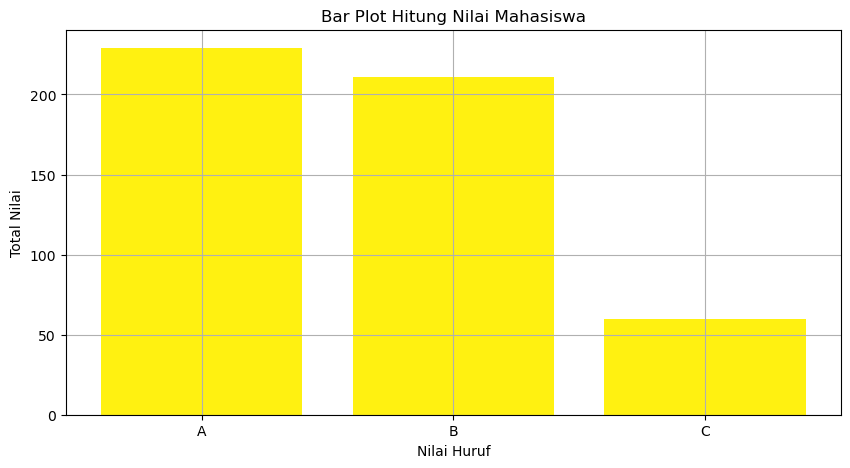

In [34]:
fig = plt.subplots(figsize = (10, 5))
plt.bar(values["nilai_huruf"], values["count"], color = '#FFF111')
plt.title("Bar Plot Hitung Nilai Mahasiswa")
plt.xlabel("Nilai Huruf")
plt.ylabel("Total Nilai")
plt.grid()
plt.show()

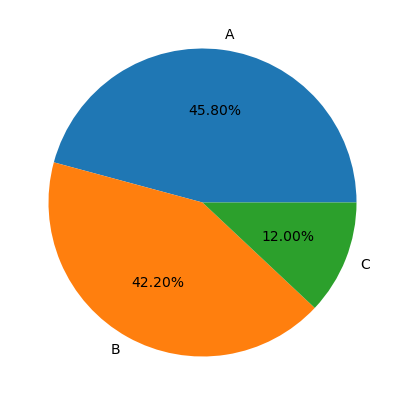

In [53]:
labels = values["nilai_huruf"]
sizes = values["count"]

fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(sizes, labels=labels, autopct='%1.2f%%')

plt.show()